# Question 1  SENA İREM TOKA 090190361

The CHATGPT session for this question is way too long because at first I could not figure out how to create the API, I researched and found wbpy which is a Python interface to the World Bank Indicators and Climate APIs. But I couldn't quite make it work for 22 countries, as it allowed max 3 counties. So I made an API for just one country in the climate change knowledge portal and I added the other country codes to the API link by looking up the code for each country on the portal. So I spent quite a long time just to create the API. At the end I realized that it was really basic.

I had to use chatgpt for this question because I didn't quite know how to assign the data into the dataframes and make the calculations on the dataframes.So I should and will be working on the pandas dataframes for the upcoming homeworks and the term project.


In [105]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

I could not use the cmip6-x0.25 data collection because it needed some model calculation input. So I used the cru-x0.5 data. The cru-x0.5 data collection API did not work when I tried to specify the dates in the API link. So I selected the dates that we needed which are the years 1950-2020.

I also tried the era5-x0.5 data collection and it gave the outputs for the plots that is asked in the question as well. Although there are some differences in between the two data collections' outputs, they seem very similar. 

Also, the Climate Change Knowlegde Portal did not have any data for Palestine so I did not include it in the API.

In [106]:
api_url = "https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr,tas_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/ESP,REU,MCO,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,EGY,LBY,TUN,DZA,MAR,MLT,CYP?_format=json"
response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()


Reading the data from the API and checking if it creates an error and attributing it to the variable 'data'. Then creating the dataframes we are said to in the question.

In [107]:
    MAST = pd.DataFrame() #for the average surface temperature per month for each country
    MAPR = pd.DataFrame() #for the average precipitation per month for each country
    YAST = pd.DataFrame() #for the average surface temperature per annum for each country
    YAPR = pd.DataFrame() #for the average precipitation per annum for each country

In the API link when I wrote 1950-2020 the data wouldn't load. So I had to take all the dates available and filter the dates that are needed.

In [108]:
start_year = 1950
end_year = 2020

for country_code, country_data in data["data"]["tas"].items():
    df = pd.DataFrame(country_data.items(), columns=["Date", "Temperature"])
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    df = df[(df.index.year >= start_year) & (df.index.year <= end_year)]

    monthly_averages = df.resample("M").mean()
    
    monthly_averages = monthly_averages.groupby(monthly_averages.index.month).mean()

    MAST[country_code] = monthly_averages["Temperature"]
    
    yearly_averages = df.resample("Y").mean()
    
    yearly_averages = yearly_averages.groupby(yearly_averages.index.year).mean()

    YAST[country_code] = yearly_averages["Temperature"]
    

this for loop above is to compute the average surface temperature montly and yearly and assign them to their specified dataframes.

in resample("M") M means month end frequency and this divides the data in monthly intervals which we need in the MAST dataframe

and in resample("Y") it divides the data by year end frequency. so we get what we need for YAST dataframe.
and the averages' means are grouped by monthly or yearly 

In [109]:
start_year = 1950
end_year = 2020

for country_code, country_data in data["data"]["pr"].items():
    df = pd.DataFrame(country_data.items(), columns=["Date", "Precipitation"])
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    df = df[(df.index.year >= start_year) & (df.index.year <= end_year)]

    monthly_averages = df.resample("M").mean()
    
    monthly_averages = monthly_averages.groupby(monthly_averages.index.month).mean()

    MAPR[country_code] = monthly_averages["Precipitation"]
    
    yearly_averages = df.resample("Y").mean()
    
    yearly_averages = yearly_averages.groupby(yearly_averages.index.year).mean()

    YAPR[country_code] = yearly_averages["Precipitation"]
    

the for loop above does the same to compute the average precipitation by dividing month end and year end with the resample function. and averages's means are grouped by monthly or yearly for precipitation

we plot each of the dataframes with the related heading, as I said earlier the data for Palestine was not available so there are only 21 countries' plotting

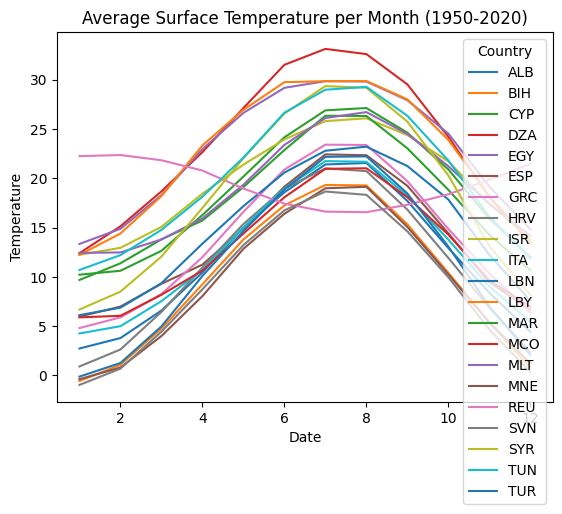

In [110]:
    MAST.plot(title="Average Surface Temperature per Month (1950-2020)")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.legend(title="Country", loc="upper right")
    plt.show()

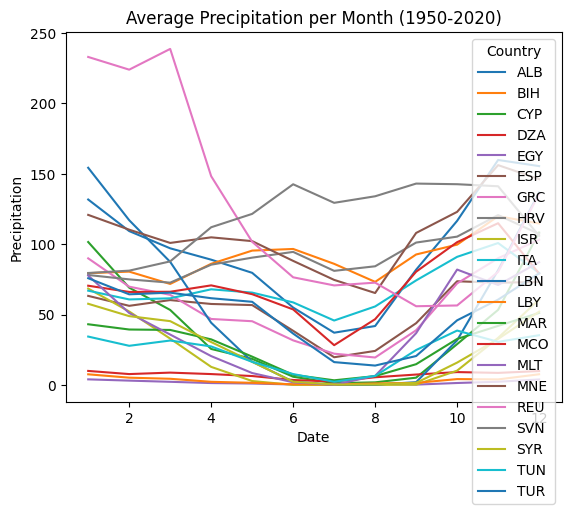

In [111]:
    MAPR.plot(title="Average Precipitation per Month (1950-2020)")
    plt.xlabel("Date")
    plt.ylabel("Precipitation")
    plt.legend(title="Country", loc="upper right")
    plt.show()

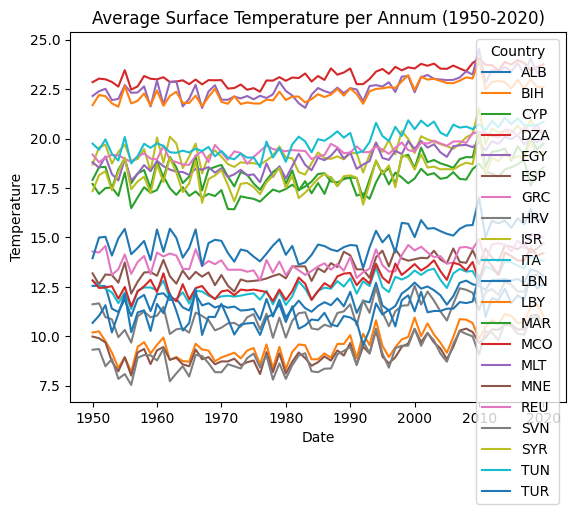

In [112]:
    YAST.plot(title="Average Surface Temperature per Annum (1950-2020)")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.legend(title="Country", loc="upper right")
    plt.show()

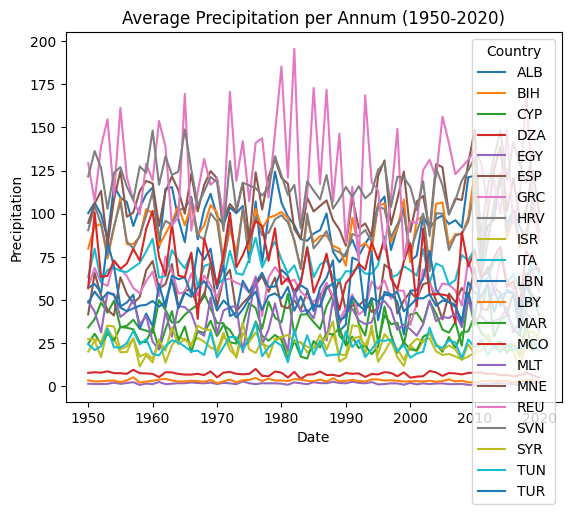

In [113]:
    YAPR.plot(title="Average Precipitation per Annum (1950-2020)")
    plt.xlabel("Date")
    plt.ylabel("Precipitation")
    plt.legend(title="Country", loc="upper right")
    plt.show()

# Question 2 

I also used chatgpt for this question but I checked everything every step. I went to yahoo finance website to check the stock codes as chatgpt gave the wrong ones for some of them. I could have figured out calculating the percent changes in a for loop etc. but I wouldn't know how to implement them to the stock data and how to do the calculations with the dataframes so I had to use chatgpt. I also checked if the calculations were done correctly.


In [114]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

importing the yfinance and pandas libraries and the matplotlib to visualize with graphs.

In [115]:
stocks = ["GOOGL", "META", "CSCO", "INTC", "AMD", "QCOM", "AAPL", "005930.KS", "1810.HK", "TSLA"]

start_date = "2019-01-01"
end_date = "2022-12-31"


creating the list of stocks we need and specifying the dates.


In [116]:
change_data = {}

creating the dictionary that will hold the data 
then downloading the stock data we want, in the dates we declared.
in the calculate_change function we calculate the percent change in between the opening and closing prices by iterating for each company.
then assign them to the dataframe.

In [117]:
for stock_symbol in stocks:
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    def calculate_change(row):
        opening_price = row['Open']
        closing_price = row['Close']
        percent_change = (closing_price - opening_price) / opening_price
        if percent_change > 0.025:
            return 1
        elif percent_change < -0.025:
            return -1
        else:
            return 0

    change_df = stock_data[['Open', 'Close']].apply(calculate_change, axis=1)
    change_data[stock_symbol] = change_df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


creating a dictionary to hold the longest intervals for -1 and 1

In [118]:
longest_intervals_data = {"-1": {}, "1": {}}

we want to find the longest continuous intervals for change, for that we define a function that we will send the dataframe and the value into. for each value in each company it compares the continuous values. 

In [119]:
def find_longest_continuous_intervals(series, value):
    longest_interval = []
    current_interval = []
    for val in series:
        if val == value:
            current_interval.append(val)
        else:
            if len(current_interval) > len(longest_interval):
                longest_interval = current_interval
            current_interval = []
    if len(current_interval) > len(longest_interval):
        longest_interval = current_interval
    return longest_interval


In [120]:
for stock in stocks:
    for value in [-1, 1]:
        longest_intervals = find_longest_continuous_intervals(change_data[stock], value)
        longest_intervals_data[str(value)][stock] = longest_intervals
        print(f"Longest intervals for {stock}: {longest_intervals}")

Longest intervals for GOOGL: [-1, -1, -1]
Longest intervals for GOOGL: [1, 1]
Longest intervals for META: [-1, -1, -1]
Longest intervals for META: [1, 1, 1]
Longest intervals for CSCO: [-1, -1]
Longest intervals for CSCO: [1, 1]
Longest intervals for INTC: [-1, -1]
Longest intervals for INTC: [1, 1]
Longest intervals for AMD: [-1, -1, -1, -1]
Longest intervals for AMD: [1, 1, 1, 1, 1, 1]
Longest intervals for QCOM: [-1, -1, -1]
Longest intervals for QCOM: [1, 1, 1, 1]
Longest intervals for AAPL: [-1, -1]
Longest intervals for AAPL: [1, 1]
Longest intervals for 005930.KS: [-1, -1]
Longest intervals for 005930.KS: [1, 1]
Longest intervals for 1810.HK: [-1, -1, -1]
Longest intervals for 1810.HK: [1, 1, 1]
Longest intervals for TSLA: [-1, -1, -1, -1, -1]
Longest intervals for TSLA: [1, 1, 1, 1]


calling the longest interval function above and storing them into the dictionary for each company.

printing them below to see the intervals 

plotting each companies' longest continuous interval for values -1 and 1 to visualize with a bar chart

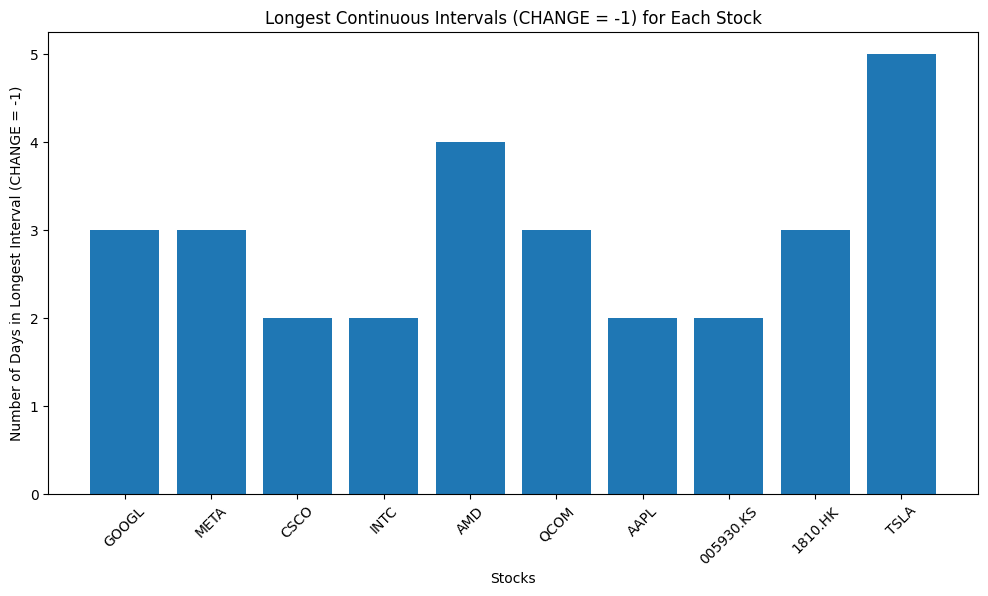

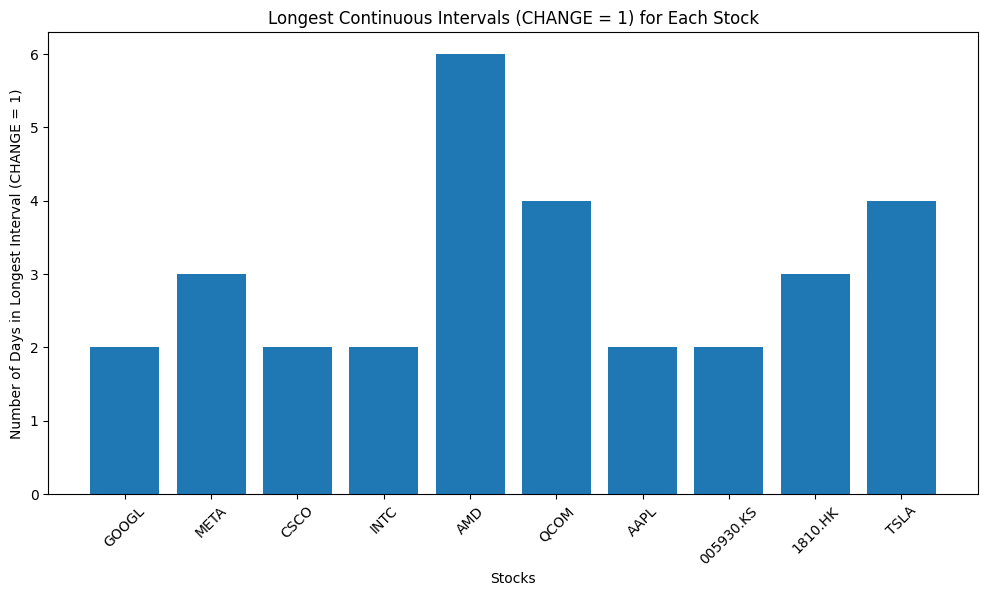

In [121]:
for value in [-1, 1]:
    plt.figure(figsize=(12, 6))
    plt.bar(longest_intervals_data[str(value)].keys(), [len(intervals) for intervals in longest_intervals_data[str(value)].values()])
    plt.xlabel('Stocks')
    plt.ylabel(f'Number of Days in Longest Interval (CHANGE = {value})')
    plt.title(f'Longest Continuous Intervals (CHANGE = {value}) for Each Stock')
    plt.xticks(rotation=45)
    plt.show()


Creating the dictionary to store the difference datas.

In [122]:
difference_data = {}

Downloading the data for each company and defining the function calculate_difference to compare each day to the day before. 

In [123]:
for stock_symbol in stocks:
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    
    def calculate_difference(row):
        opening_price = row['Open']
        previous_opening_price = row['Previous_Open']
        percent_change = (opening_price - previous_opening_price) / previous_opening_price
        if percent_change > 0.025:
            return 1
        elif percent_change < -0.025:
            return -1
        else:
            return 0    
    stock_data['Previous_Open'] = stock_data['Open'].shift(1)
    difference_df = stock_data[1:][['Open', 'Previous_Open']].apply(calculate_difference, axis=1)
    difference_data[stock_symbol] = difference_df
    difference_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


creating the dictionary to hold the companies' longest intervals and

defining the function to find the longest continuous interval for the difference data in a for loop. by sending the dataframe in the function and the value as -1 or 1 

In [124]:
longest_intervals_data = {"-1": {}, "1": {}}

In [125]:
def find_longest_continuous_intervals(series, value):
    longest_interval = []
    current_interval = []
    for val in series:
        if val == value:
            current_interval.append(val)
        else:
            if len(current_interval) > len(longest_interval):
                longest_interval = current_interval
            current_interval = []
    if len(current_interval) > len(longest_interval):
        longest_interval = current_interval
    return longest_interval

calling the function for the difference data for each stock and attributing them into the dictionary. And printing the intervals for each company

In [126]:
for stock in stocks:
    for value in [-1, 1]:
        longest_intervals = find_longest_continuous_intervals(difference_data[stock], value)
        longest_intervals_data[str(value)][stock] = longest_intervals
        print(f"Longest intervals for {stock}:{longest_intervals}")


Longest intervals for GOOGL:[-1, -1, -1]
Longest intervals for GOOGL:[1, 1, 1]
Longest intervals for META:[-1, -1, -1]
Longest intervals for META:[1, 1, 1]
Longest intervals for CSCO:[-1, -1]
Longest intervals for CSCO:[1, 1]
Longest intervals for INTC:[-1, -1, -1]
Longest intervals for INTC:[1, 1, 1]
Longest intervals for AMD:[-1, -1, -1, -1, -1]
Longest intervals for AMD:[1, 1, 1, 1]
Longest intervals for QCOM:[-1, -1, -1, -1]
Longest intervals for QCOM:[1, 1, 1]
Longest intervals for AAPL:[-1, -1, -1]
Longest intervals for AAPL:[1, 1]
Longest intervals for 005930.KS:[-1, -1, -1]
Longest intervals for 005930.KS:[1, 1]
Longest intervals for 1810.HK:[-1, -1]
Longest intervals for 1810.HK:[1, 1, 1, 1]
Longest intervals for TSLA:[-1, -1, -1, -1]
Longest intervals for TSLA:[1, 1, 1, 1, 1]


Printing the longest intervals for each company for the difference data. 

Visualizing the continuous intervals for difference with a bar chart

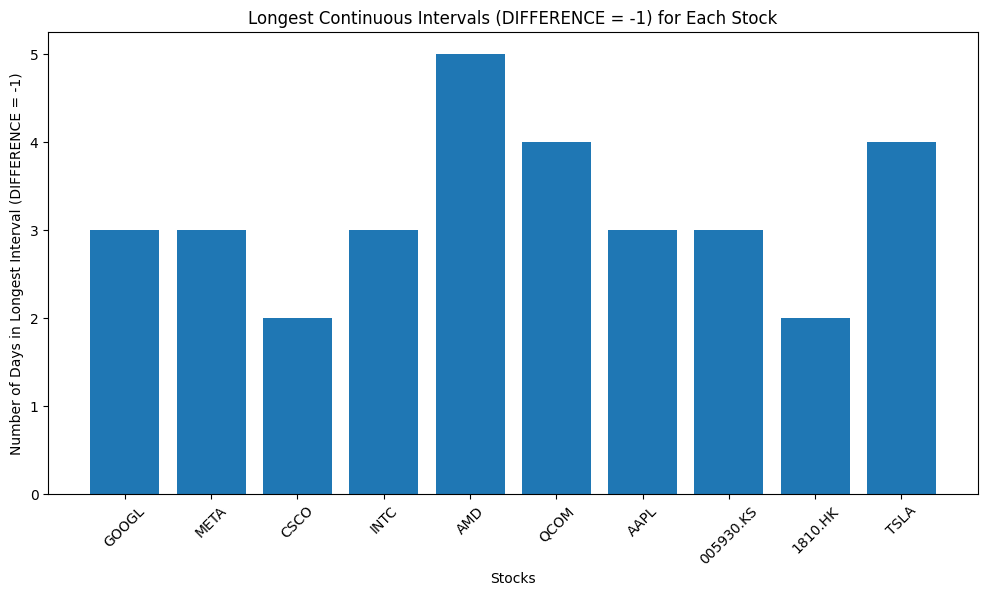

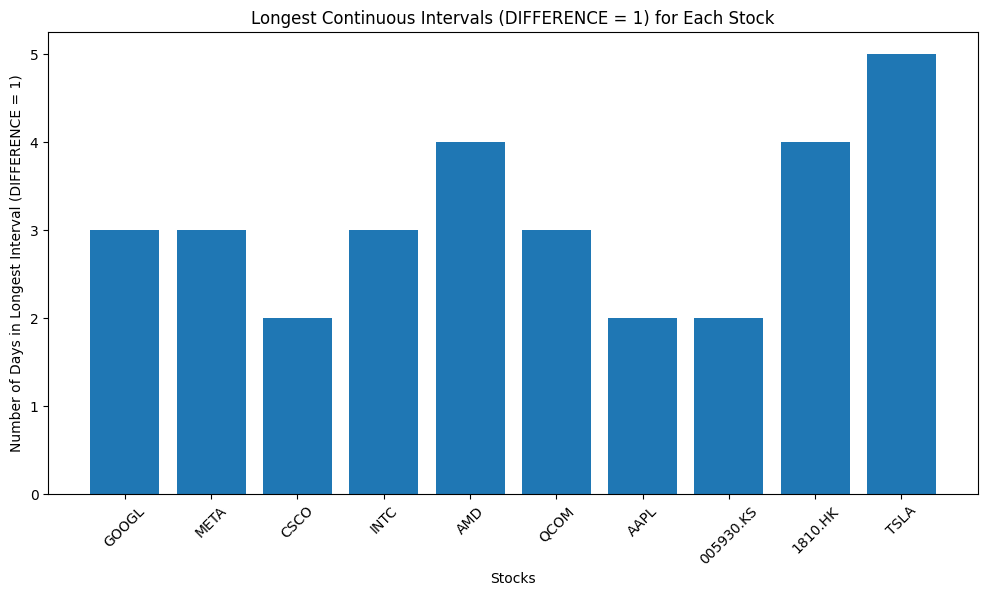

In [127]:
for value in [-1, 1]:
    plt.figure(figsize=(12, 6))
    plt.bar(longest_intervals_data[str(value)].keys(), [len(intervals) for intervals in longest_intervals_data[str(value)].values()])
    plt.xlabel('Stocks')
    plt.ylabel(f'Number of Days in Longest Interval (DIFFERENCE = {value})')
    plt.title(f'Longest Continuous Intervals (DIFFERENCE = {value}) for Each Stock')
    plt.xticks(rotation=45)
    plt.show()